La regresion logistica se utiliza para predecir respuestas del tipo SI y NO. Ya no se brindan numeros aproximados como respuestas sino, que se indica SI es probable que suceda o NO

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

NUESTRO PROGRAMA BUSCARA PREDECIR QUE FUTUROS CLIENTES PODRÍAN LLEGAR A CONTRATAR NUESTRO SEGURO BASADOS EN LOS REGISTROS DE ANTERIORES CLIENTES, SUS CARACTERISTICASM INGRESOS, UBICACION, ETC. LO QUE HAYA EN LA BASE DE DATOS

In [3]:
ruta = r"C:\Users\dario\Escritorio\CursoPython\Curso Machine Learning - Data\Día 11\Cuadernos para Prácticas\datos_seguro.csv"

In [8]:
df = pd.read_csv(ruta)
df.head()

,edad,compra
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


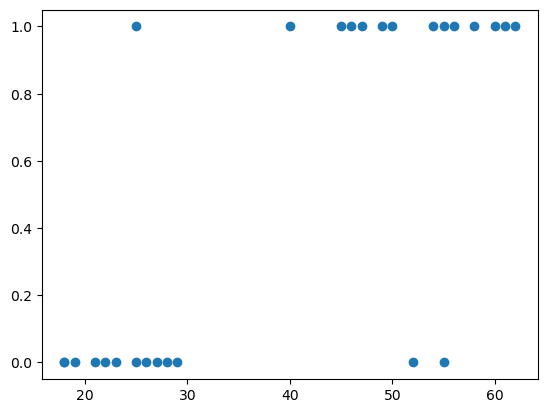

In [9]:
plt. scatter(df["edad"], df["compra"])

Con el grafico anterior, podemos predecir que aparentemente la edad de nuestros compradores es un factor clave en la decision. Los mayores de 40 años han sido los que mas han optado por nuestro negocio

In [14]:
#Vamos a separar los datos en dos conjuntos
# 1 conjunto de datos para entrenamiento
# 1 conjunto de datos para pruebas

#para poder hcaer eso voy a utilizar lo importado
#from sklearn.model_selection import train_test_split


X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(df[["edad"]], 
                                                            df["compra"], 
                                                            train_size = 0.9)

#train_size lo que hace ese parametro es dividir la cantidad
#de datos segun entrenamiento y prueba. Como le pusimos
#como valor 0.9 (eso es decir 90%) establecimos que
#justamente el 90% de los valores vayan a prueba
#y solo el 10% restante a prueba. Si no ponemos nada
#por defecto la separacion va a ser de 80/20
# 80 train y 20 de prueba

In [12]:
X_entrena

,edad
23,45
22,40
7,60
6,55
11,28
4,46
13,29
25,54
2,47
18,19


In [13]:
X_prueba

,edad
14,49
5,56
17,58


In [16]:
#Generamos el modelo de regresion logistica
modelo = LogisticRegression()

In [17]:
modelo.fit(X_entrena, y_entrena)

LogisticRegression()

In [19]:
#probamos el desempeño del modelo creado. Para eso nos
#ayuda el metodo score y le pasamos como parametro
#los valores de entrenamiento
modelo.score(X_entrena, y_entrena)

#el valor que nos da, es el porcentaje de probabilidad
#que tendra de acertar nuestro valor

0.9166666666666666

In [20]:
#importamos datos nuevos para probar nuestro modelo

datos_nuevos = pd.DataFrame({"edad": [25,35,45,55]})
datos_nuevos

,edad
0,25
1,35
2,45
3,55


In [21]:
probabilidades = modelo.predict_proba(datos_nuevos)
probabilidades

#esto que hicimos es, utilizar el modelo, para con
#predict_proba predecir los datos nuevos ingresados
#esta variable nos va a devoler un array con las 
#probabilidades de que NO compren primero y de que 
#SI compren como segundo componente

array([[0.86935037, 0.13064963],
       [0.57304461, 0.42695539],
       [0.21304645, 0.78695355],
       [0.05177904, 0.94822096]])

In [22]:
#vamos a separar el array para obtener solamente las 
#probabilidades de que SI compre el cliente
prob_compra = probabilidades[:,1]
prob_compra

array([0.13064963, 0.42695539, 0.78695355, 0.94822096])

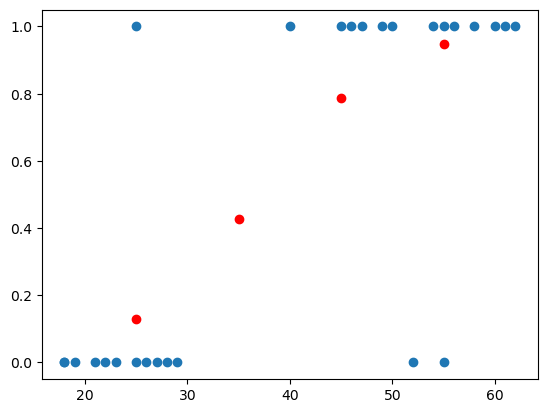

In [23]:
#Graficamos todo junto

plt.scatter(df["edad"],df["compra"])
plt.scatter(datos_nuevos["edad"], prob_compra,
            color = "red");

En el grafico observamos segun la edad, las probabilidades que iran teniendo los clientes
en 0 estan los que no compraron, en 1 los que si y en el intermedio se posicionan los nuevos datos agregados viendo su posibilidad de compre. Efectivamente visualizamos que el porcentaje de probabilidad incrementa acorde a la edad


# Practica

In [24]:
datos = {
    'edad': [25, 30, 45, 22, 34, 40, 27, 31, 43, 50],
    'salario': [50000, 54000, 72000, 42000, 62000, 68000, 49000, 56000, 76000, 90000],
    'compra': [0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
}

df = pd.DataFrame(datos)
df

,edad,salario,compra
0,25,50000,0
1,30,54000,0
2,45,72000,1
3,22,42000,0
4,34,62000,1
5,40,68000,1
6,27,49000,0
7,31,56000,0
8,43,76000,1
9,50,90000,1


Text(0, 0.5, 'Compra de Seguros')

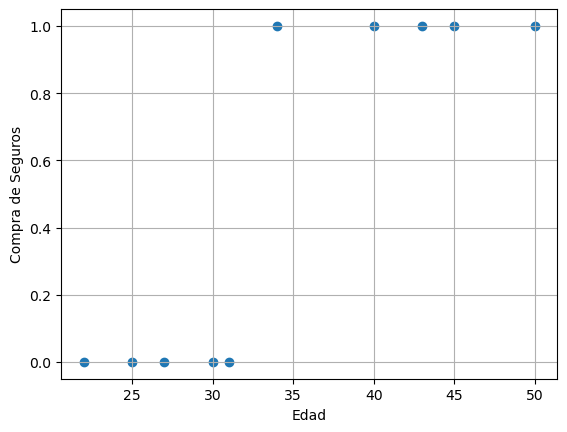

In [25]:
plt.scatter(df.edad, df.compra)
plt.grid(True)
plt.xlabel("Edad")
plt.ylabel("Compra de Seguros")

In [36]:
# Separar las características y la variable objetivo
X = df[['edad']]
y = df['compra']

X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X,
                                        y, train_size = 0.9, random_state=42)
                                        

# ¿Qué hace random_state?
train_test_split() divide los datos de forma aleatoria. Pero si no fijas la "semilla" de aleatoriedad (es decir, random_state), cada vez que ejecutes el código, obtendrás una división diferente de tus datos.

Al poner:

# random_state=42

estás fijando la semilla del generador aleatorio. Esto garantiza que la partición de los datos siempre será la misma cada vez que corras el código, lo cual es fundamental para:

Comparar resultados entre distintos modelos de forma justa.

Hacer debugging (depuración) más fácil.

Compartir tu código con otras personas y que obtengan los mismos resultados.

In [ ]:
modelo = LogisticRegression()

modelo.fit(X_entrena,y_entrena)

In [28]:
modelo.score(X_entrena, y_entrena)

0.9047619047619048

In [30]:
datos_nuevos = pd.DataFrame({'edad': [25, 35, 45, 55]})


In [31]:
probabilidades = modelo.predict_proba(datos_nuevos)
probabilidades

array([[9.98958844e-01, 1.04115603e-03],
       [1.25082095e-01, 8.74917905e-01],
       [2.13017190e-05, 9.99978698e-01],
       [3.17409521e-09, 9.99999997e-01]])

In [32]:
prob_compra = probabilidades[:,1]
prob_compra


array([0.00104116, 0.87491791, 0.9999787 , 1.        ])

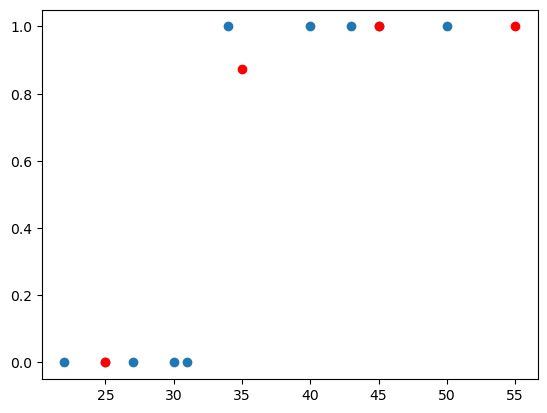

In [33]:
plt.scatter(df.edad, df.compra)
plt.scatter(datos_nuevos["edad"], prob_compra, color="red");